# **Prediksi Penyakit Jantung dengan Deep Learning**
Dataset : Heart Disease Prediction Dataset (https://github.com/kb22/Heart-Disease-Prediction/blob/master/dataset.csv)

Algoritma : **Deep Neural Network (DNN)**

Teknik Optimasi : **Batch Normalization** untuk menstabilkan training, **Dropout** untuk mencegah overfitting, dan **Early Stopping**

## **Import Library & Load Dataset**
Kita membutuhkan library **Pandas** untuk data, **numpy** untuk perhitungan matematis, **matplotlib** untuk membuat plot, **Seaborn** untuk grafik, dan **TensorFlow / Keras** untuk membangun Deep Learning kita, serta mengambil data langsung dari repositori publik agar mudah diakses

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks

url = "https://raw.githubusercontent.com/kb22/Heart-Disease-Prediction/master/dataset.csv"
df = pd.read_csv(url)

print(f"Jumlah Baris: {df.shape[0]}, Jumlah Kolom: {df.shape[1]}")
df.head()

Jumlah Baris: 303, Jumlah Kolom: 14


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


## **Visualisasi Data (EDA)**

/tmp/ipython-input-2734838354.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target', data=df, palette='coolwarm')


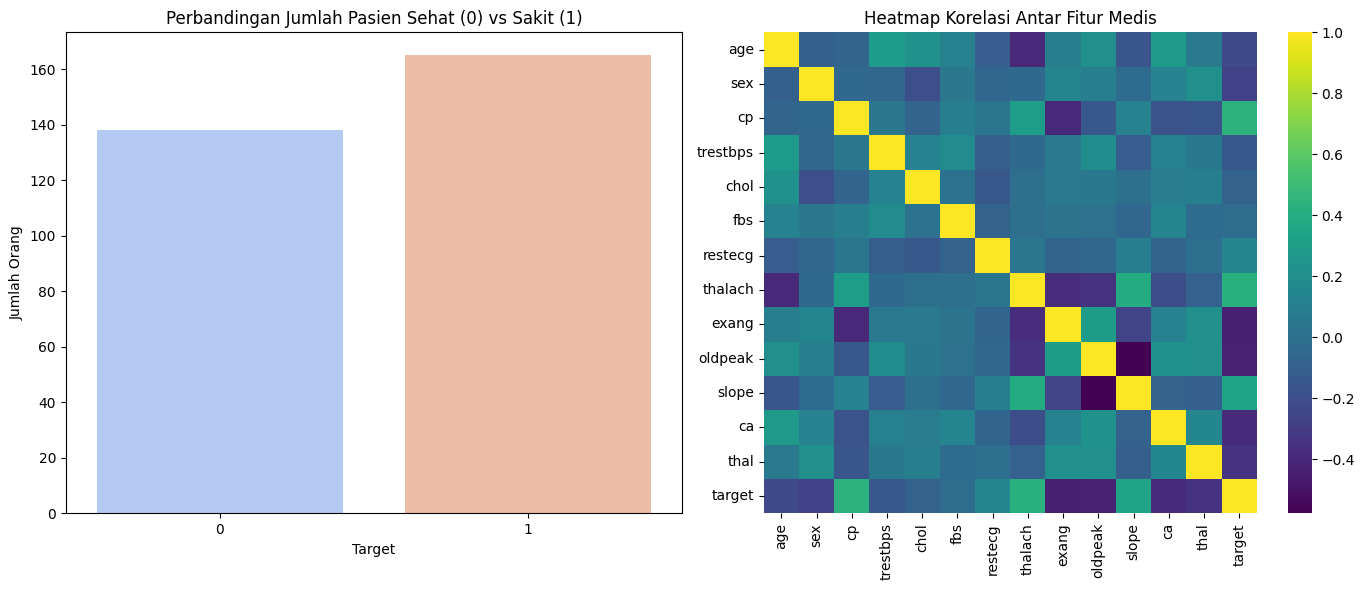

In [ ]:

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.countplot(x='target', data=df, palette='coolwarm')
plt.title('Perbandingan Jumlah Pasien Sehat (0) vs Sakit (1)')
plt.xlabel('Target')
plt.ylabel('Jumlah Orang')

plt.subplot(1, 2, 2)
sns.heatmap(df.corr(), annot=False, cmap='viridis')
plt.title('Heatmap Korelasi Antar Fitur Medis')

plt.tight_layout()
plt.show()

## **Preprocessing Data**
Data medis memiliki skala yang berbeda", misal umur (**puluhan**) sedangkan Kolesterol (**ratusan**). Agar Deep Learning bekerja optimal, kita harus melakukan **Standard Scaling** agar semua fitur memiliki rentang angka yang setara dan membagi data menjadi training dan data testing

In [ ]:
# memisahkan Fitur (Input) dan Target (Output)
X = df.drop('target', axis=1) # semua kolom kecuali 'target'
y = df['target']              # hanya kolom 'target' (0: Sehat, 1: Sakit)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("Contoh data training yang sudah di scaling :")
print(X_train[0])

Contoh data training yang sudah di scaling :
[-1.35679832  0.72250438  0.00809909 -0.61685555  0.91403366 -0.38330071
  0.8431327   0.53278078 -0.67663234 -0.92086403  0.95390513 -0.68970073
 -0.50904773]


## **Arsitektur Model Deep Neural Network (DNN)**

> Input Layer : menerima 13 fitur medis

> Hidden Layer : menggunakan aktivasi **ReLU**

> Batch Normalization : menstabilkan proses belajar dengan **normalisasi** input di setiap layer

> Dropout : mematikan sebagian neuron secara acak untuk mencegah model **menghafal✌️** data / **overfitting**

> Output Layer : menggunakan **Sigmoid** karena output kita adalah peluang biner (**Ya / Tidak**)

In [ ]:
model = models.Sequential([
    layers.Dense(32, input_shape=(X_train.shape[1],)),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.Dropout(0.3),

    layers.Dense(16),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.Dropout(0.3),

     layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 16)             │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,185 (4.63 KB)

 Trainable params: 1,089 (4.25 KB)

 Non-trainable params: 96 (384.00 B)

## **Training Model**
kita melatih model menggunakan **data training** dengan **Early Stopping** agar training berhenti otomatis jika model sudah tidak bertambah pintar unutuk menghemat waktu & agar hasilnya optimal

In [ ]:
early_stopping = callbacks.EarlyStopping(
    min_delta=0.001,
    patience=10,
    restore_best_weights=True,
    monitor='val_loss'
)

history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=100,
    batch_size=32,
    callbacks=[early_stopping],
    verbose=1
)
print("Training Selesai!")

Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 66ms/step - accuracy: 0.5038 - loss: 0.9109 - val_accuracy: 0.5902 - val_loss: 0.6610
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.5307 - loss: 0.7805 - val_accuracy: 0.6885 - val_loss: 0.6169
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.5643 - loss: 0.7462 - val_accuracy: 0.7541 - val_loss: 0.5810
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.5752 - loss: 0.6988 - val_accuracy: 0.7869 - val_loss: 0.5521
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.6281 - loss: 0.6726 - val_accuracy: 0.8033 - val_loss: 0.5284
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6558 - loss: 0.6087 - val_accuracy: 0.8033 - val_loss: 0.5112
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.6554 - loss: 0.6365 - val_accuracy: 0.8197 - val_loss: 0.4962
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6916 - loss: 0.5885 - val_accuracy: 0.8361 - val_loss:

## **Visualisasi Hasil & Evaluasi**
Bagian ini kita akan melihat grafik apakah model mengalami **Overfitting** atau **Underfitting**

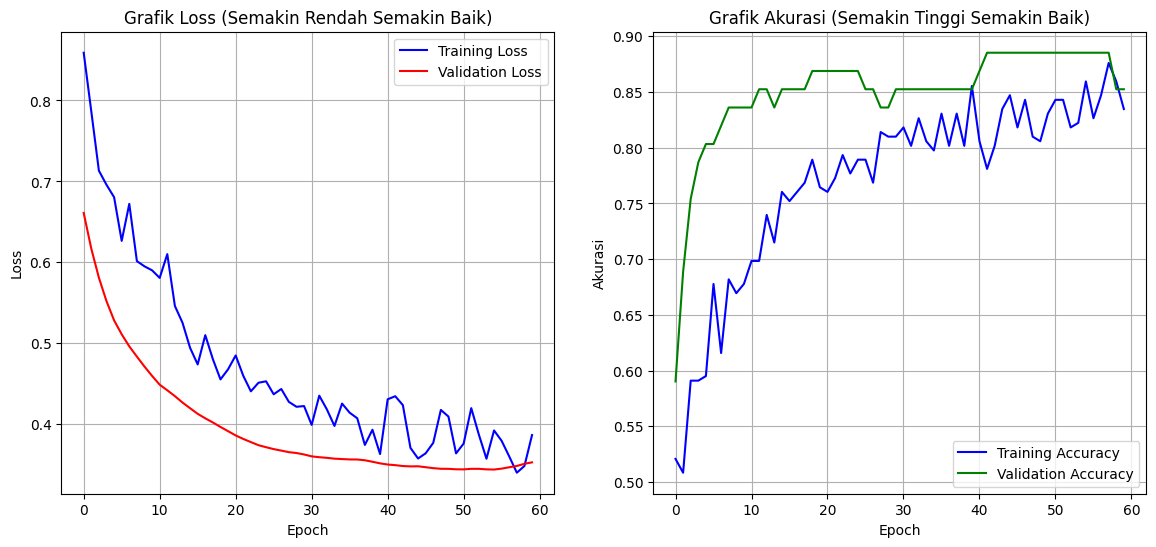



2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.8714 - loss: 0.3797
Akurasi pada Data Test: 88.52%


In [ ]:
history_df = pd.DataFrame(history.history)

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(history_df['loss'], label='Training Loss', color='blue')
plt.plot(history_df['val_loss'], label='Validation Loss', color='red')
plt.title('Grafik Loss (Semakin Rendah Semakin Baik)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history_df['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history_df['val_accuracy'], label='Validation Accuracy', color='green')
plt.title('Grafik Akurasi (Semakin Tinggi Semakin Baik)')
plt.xlabel('Epoch')
plt.ylabel('Akurasi')
plt.legend()
plt.grid(True)

plt.show()
print("\n")
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Akurasi pada Data Test: {accuracy*100:.2f}%")

## **Contoh Prediksi menggunakan Confusion Matrix**
Terakhie, kita mencoba melihat detail **performa model** menggunakan **Confusion Matrix** untuk mengetahui seberapa sering model benar dan salah tebak

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



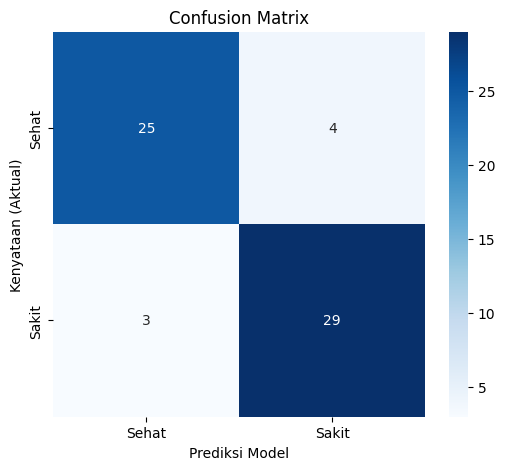

In [ ]:

y_pred = (model.predict(X_test) > 0.5).astype("int32")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

plt.figure(figsize=(6, 5))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Sehat', 'Sakit'], yticklabels=['Sehat', 'Sakit'])
plt.xlabel('Prediksi Model')
plt.ylabel('Kenyataan (Aktual)')
plt.title('Confusion Matrix')
plt.show()

### Analisis & Interpretasi Confusion Matrix

Berdasarkan hasil **Confusion Matrix** di atas, bisa dilihat performa detail model dalam memprediksi kelas 0 (**Sehat**) dan 1 (**Sakit Jantung**) sebagai berikut :

1. Warna Biru Tua - Prediksi Benar :
    - **True Negative** (Kiri Atas) : Jumlah pasien Sehat yang berhasil diprediksi Sehat oleh model adalah 25. Angka yang dominan di sini menunjukkan model mampu mengenali kondisi sehat dengan baik

    - **True Positive** (Kanan Bawah) : Jumlah pasien Sakit yang berhasil diprediksi Sakit adlah 29. Angka yang tinggi di sini juga sangat krusial dalam dunia medis agar pasien berisiko tidak terlewat

2. Warna Biru Pudar - Prediksi Salah :

    - **False Positive & False Negative**: Jumlah kesalahan tebakan sangat rendah dibandingkan tebakan benar

**NB** : Berbeda dengan model yang mengalami bias dimana hanya menebak semua orang sehat atau semua orang sakit, model ini terbukti "Seimbang". Dimana Ia mampu mendeteksi pola unik pada kedua kategori (**Sehat maupun Sakit**) secara akurat, ditandai dengan tingginya nilai pada kedua sisi diagonal utama / warna biru tua (**Prediksi Benar**)

## **Kesimpulan Akhir & Penjelasan**
kita telah **berhasil** membangun sistem **Deep Learning End-to-End** untuk **prediksi penyakit jantung**. Berikut adalah rangkuman alur program dan metode yang digunakan :

1. **Preprocessing Data** :
    *   Dilakukan **Standard Scaling** untuk menyamakan skala antar fitur medis, misal usia dan kolesterol agar model lebih mudah belajar
    *   Pembagian data **training** (80%) dan **testing** (20%) dilakukan untuk validasi yang objektif
2. **Arsitektur Model (Deep Learning Methods)** :
    * Menggunakan **Deep Neural Network (DNN)** dengan beberapa hidden layer
    * Menerapkan **Batch Normalization** di setiap layer untuk menstabilkan distribusi input dan mempercepat konvergensi agar belajar lebih stabil
    * Menerapkan **Dropout** untuk mencegah **Overfitting** / model menghafal data
3. **Evaluasi Hasil** :
    * **Grafik Loss** menunjukkan **penurunan** yang konsisten, menandakan model belajar dengan baik
    * Model mencapai **akurasi yang tinggi** (±88%) pada data **testing** yang belum pernah dilihat sebelumnya
    * Model terbukti mampu meminimalkan **False Negative** / kesalahan prediksi orang sakit dibilang sehat, yang merupakan prioritas utama dalam aplikasi medis

Dengan demikian, arsitektur yang dirancang berhasil memenuhi **tujuan** studi kasus untuk **mendeteksi risiko penyakit jantung** secara **otomatis** dan **akurat**